<a href="https://colab.research.google.com/github/shekhs/Time-Series-Forecasting/blob/main/Introduction_to_Forecasting_TensorFlow_Structural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and data loading



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Set Working Directory
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python
#%cd /content/drive/MyDrive/Personal/Forecasting Models and Time Series for Business in Python 2021

/content/drive/.shortcut-targets-by-id/1PPU1CxtBeYaPlKtx2GN7ulYeIrUPxq6s/Forecasting Models and Time Series for Business in Python


In [3]:
#importing libraries
import pandas as pd
import numpy as np

In [4]:
#get data
data = pd.read_csv("Daily Bike Sharing.csv", index_col="dteday", parse_dates=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#Selecting variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit", 
                       "temp", "atemp", "hum", "windspeed"]]

# Data Transformation

In [6]:
#rename forecasting variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head()

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [7]:
#index
dataset.index
dataset = dataset.asfreq("D")

# Visualization

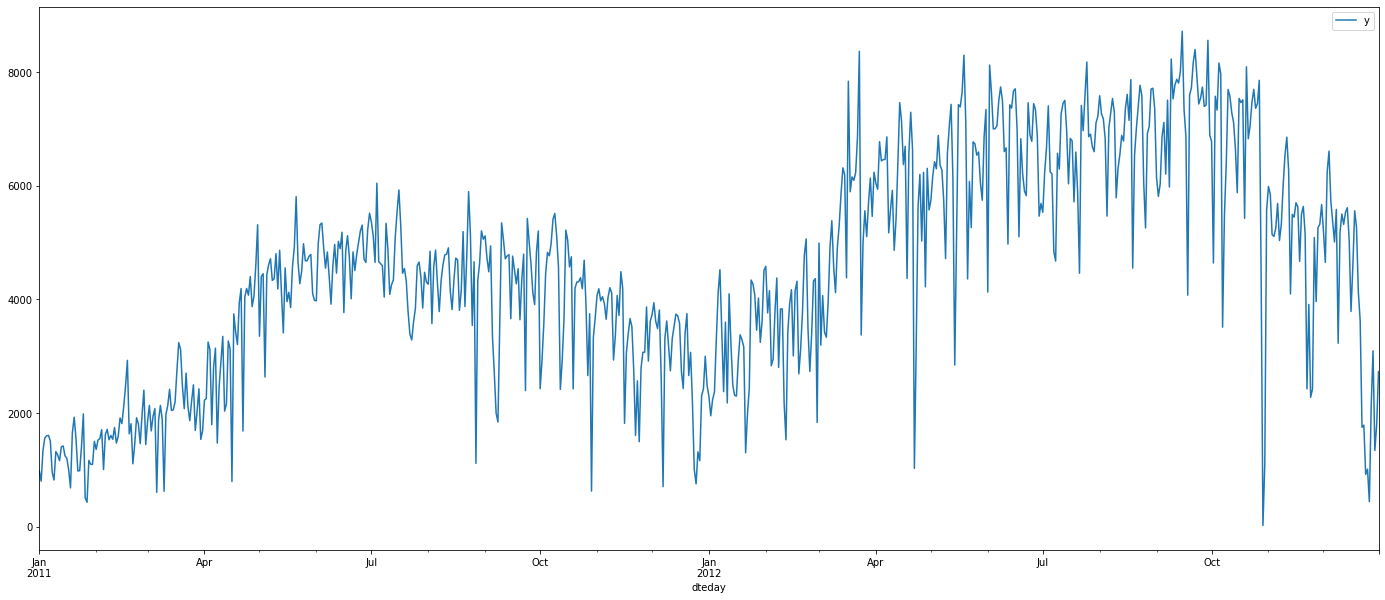

In [8]:
#Visualization
dataset["y"].plot(figsize = (24,10),legend = True)

# Seasonal Decomposition

In [9]:
#importing Decomposition library
from statsmodels.tsa.seasonal import seasonal_decompose

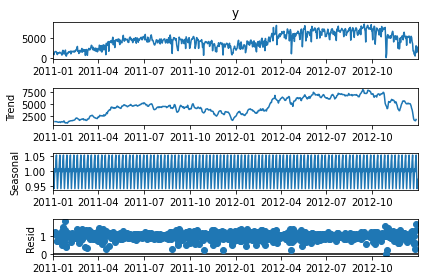

In [10]:
#decomposition

decomposition = seasonal_decompose(dataset['y'],
                                   model = 'multiplicative')
decomposition.plot();

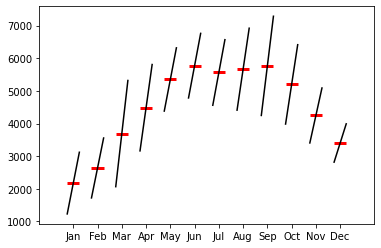

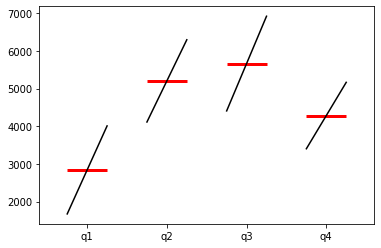

In [11]:
#seasonality graphs
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(dataset['y'].resample(rule = 'MS').mean())
quarter_plot(dataset['y'].resample(rule = 'Q').mean());

# Training and Test Set

In [12]:
test_days = 31
training_set = dataset.iloc[:-test_days,:]
test_set = dataset.iloc[-test_days:,:]
test_set.tail(2)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-30,1796,0,0,1,0.255833,0.231700,0.483333,0.350754
2012-12-31,2729,0,1,2,0.215833,0.223487,0.577500,0.154846


# Holt-Winters

In [13]:
# importing libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [14]:
#forecasting model
model = ExponentialSmoothing(endog = training_set.y,
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods=7).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [15]:
#making predictions
predictions_hw = model.forecast(steps = len(test_set)).rename("HW")


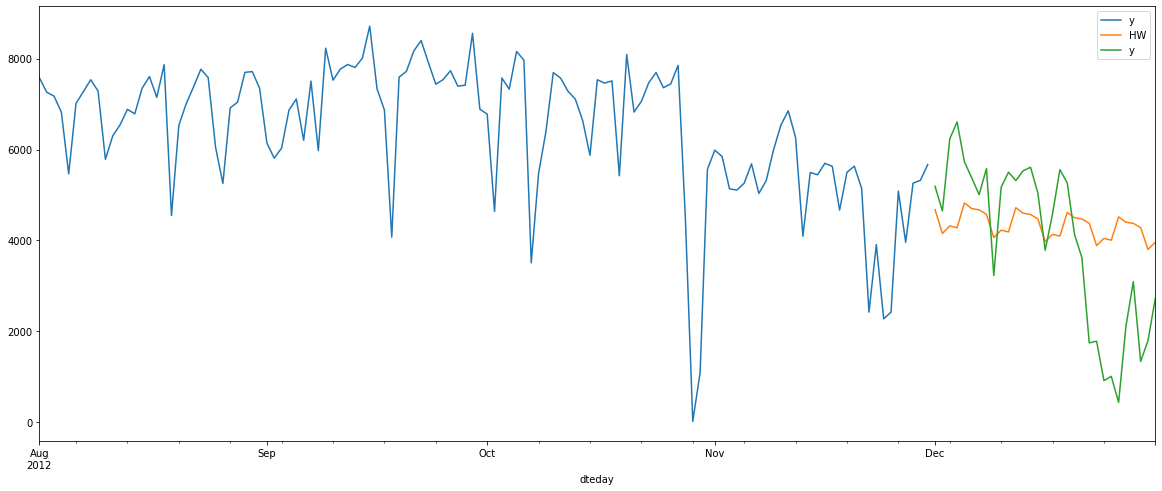

In [16]:
# plotting prediction results
training_set['y']['2012-08-01':].plot(figsize=[20,8],legend=True)
predictions_hw.plot(legend = True)
test_set.y.plot(legend = True)

# Model assessment

In [17]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE : ",end="")
print(round(mean_absolute_error(test_set['y'], predictions_hw),0))
print("RMSE : ",end="")
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_hw)), 0))

MAE : 1389.0
RMSE : 1698.0


In [18]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("MAPE : ",end="")
print(MAPE(test_set['y'], predictions_hw))

MAPE : 87.26099293841784


# Exporting forecasts

In [19]:
# %cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble
# predictions_hw.to_csv('predictions_hw.csv', index = True)

# TBATS Model

In [20]:
#!pip install tbats

In [21]:
#libraries
from tbats import TBATS

In [22]:
#tbats model
model = TBATS(use_trend = True,seasonal_periods = [7, 365.5])
model = model.fit(training_set['y'])

In [23]:
#predictions
predictions_tbats = pd.Series(model.forecast(steps = len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index
predictions_tbats.head()

dteday
2012-12-01    4828.272249
2012-12-02    4482.064414
2012-12-03    4362.513961
2012-12-04    4305.123489
2012-12-05    4260.338328
Freq: D, Name: TBATS, dtype: float64

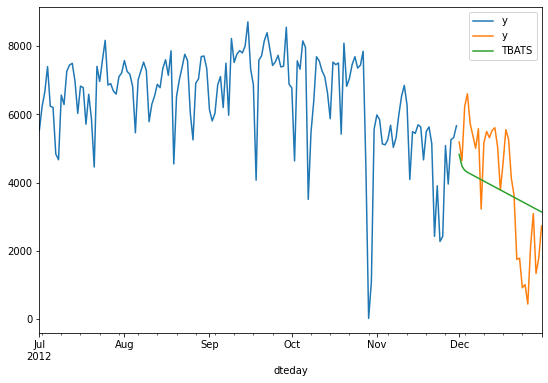

In [24]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_tbats.plot(legend = True)

In [25]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_tbats),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_tbats)), 0))

1299.0
1494.0


In [26]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_tbats)

68.06406403722941

# SARIMAX

In [27]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(dataset['y'])
print('Augmented Dickey Fuller p-value: %F' % stationarity[1])

Augmented Dickey Fuller p-value: 0.342743


In [29]:
#exogenous variables
train_exog = training_set.iloc[:,1:]
test_exog = test_set.iloc[:,1:]
test_exog.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,
2012-12-01,0,0,2,0.298333,0.316904,0.806667,0.059704
2012-12-02,0,0,2,0.347500,0.359208,0.823333,0.124379
2012-12-03,0,1,1,0.452500,0.455796,0.767500,0.082721
2012-12-04,0,1,1,0.475833,0.469054,0.733750,0.174129
2012-12-05,0,1,1,0.438333,0.428012,0.485000,0.324021


In [30]:
#Libraries
from pmdarima import auto_arima
#forecasting model
model = auto_arima(y = training_set['y'],
                   X = train_exog,
                   m = 7,
                   seasonal = True,
                   stepwise = False)

In [31]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -5596.921
Date:                Sat, 29 Oct 2022   AIC                          11217.842
Time:                        19:10:15   BIC                          11272.438
Sample:                    01-01-2011   HQIC                         11238.948
                         - 11-30-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3763      5.567      0.786      0.432      -6.535      15.288
holiday     -240.1568    129.119     -1.860      0.063    -493.226      12.912
workingday    89.0633     60.536      1.471      0.141     -29.584     207.711
weathersit  -460.3328     51.310     -8.972      0.000    -560.898    -359.768
temp        3421.6482   1170.989      2.922      0.003    1126.552    5716.744
atemp       1970.6162   1197.587      1.645      0.100    -376.612    4317.844
hum        -2280.5012    198.535    -11.487      0.000   -2669.623   -1891.380
windspeed  -2275.5094    373.409     -6.094      0.000   -3007.379   -1543.640
ma.L1         -0.5547      0.028    -19.640      0.000      -0.610      -0.499
ma.L2         -0.1350      0.039     -3.426      0.001      -0.212      -0.058
ma.L3         -0.1440      0.040     -3.598      0.000      -0.222      -0.066
sigma2      5.263e+05   2.02e+04     26.104      0.000    4.87e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               623.58
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
#predictions

predictions_sarimax = pd.Series(model.predict(n_periods= test_days,
                              X = test_exog)).rename("SARIMAX")
predictions_sarimax.index = test_set.index                              
predictions_sarimax

dteday
2012-12-01    4288.680992
2012-12-02    4216.703531
2012-12-03    5448.271150
2012-12-04    5427.577928
2012-12-05    5448.958443
2012-12-06    4779.754167
2012-12-07    4189.833572
2012-12-08    4177.483945
2012-12-09    4076.189088
2012-12-10    4317.701657
2012-12-11    4356.400946
2012-12-12    4524.792938
2012-12-13    5071.849557
2012-12-14    4767.151815
2012-12-15    4954.477004
2012-12-16    4275.132803
2012-12-17    4386.086938
2012-12-18    5195.850476
2012-12-19    4977.115123
2012-12-20    4519.479592
2012-12-21    4149.748980
2012-12-22    4376.064391
2012-12-23    4812.987533
2012-12-24    3893.188547
2012-12-25    3764.425713
2012-12-26    2789.159600
2012-12-27    3615.577846
2012-12-28    4259.511425
2012-12-29    3849.112639
2012-12-30    4400.967590
2012-12-31    4112.066418
Freq: D, Name: SARIMAX, dtype: float64

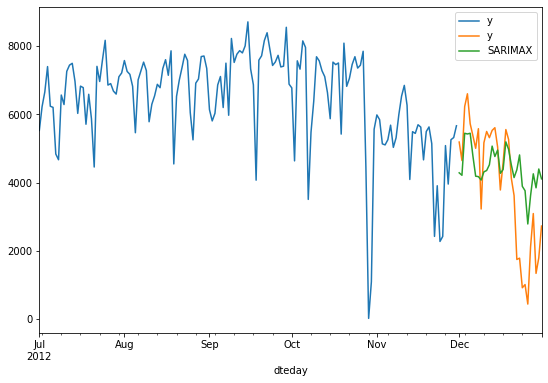

In [33]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_sarimax.plot(legend = True)

In [34]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_sarimax),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_sarimax)), 0))

1180.0
1480.0


In [35]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_sarimax)

71.28239664687945

# Tensor Flow Structural Time Series

In [36]:
#get a library
import tensorflow_probability as tfp

In [37]:
#Isolate the regressors
exog = np.asmatrix(dataset.iloc[:,1:].astype(np.float64))
exog[:1]

matrix([[0.      , 0.      , 2.      , 0.344167, 0.363625, 0.805833,
         0.160446]])

In [38]:
#linear regression
regressors = tfp.sts.LinearRegression(design_matrix = exog,
                                      name = "regressors")

In [39]:
#isolating dependent variable
y = training_set['y'].astype(np.float64)
y[:5]

dteday
2011-01-01     985.0
2011-01-02     801.0
2011-01-03    1349.0
2011-01-04    1562.0
2011-01-05    1600.0
Freq: D, Name: y, dtype: float64

In [40]:
#Weekday seasonality
weekday_effect = tfp.sts.Seasonal(num_seasons = 7,
                                  num_steps_per_season = 1,
                                  observed_time_series = y,
                                  name = "weekday_effect")

In [41]:
#number of days per month
num_days_per_month = np.array(
    [[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31], #2011
     [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]]) # 2012

In [42]:
#Monthly seasonality
monthly_effect = tfp.sts.Seasonal(num_seasons = 12,
                                  num_steps_per_season = num_days_per_month,
                                  observed_time_series = y,
                                  name = "monthly_effect")

In [43]:
#trend 
trend = tfp.sts.LocalLinearTrend(observed_time_series=y,
                                 name = "trend")
#Autoregressive
autoregressive = tfp.sts.Autoregressive(order = 1,
                                        observed_time_series = y,
                                        name = "autoregressive")

In [44]:
#forecasting model
model = tfp.sts.Sum([regressors,
                     weekday_effect,
                     monthly_effect,
                     autoregressive,
                     trend],
                    observed_time_series = y)

In [45]:
#fit with HMC
samples, kernel_results = tfp.sts.fit_with_hmc(model = model,
                                               observed_time_series = y,
                                               num_results = 100,
                                               num_warmup_steps = 50,
                                               num_leapfrog_steps = 15,
                                               num_variational_steps = 150,
                                               seed = 1502)

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


In [46]:
#forecast
forecast = tfp.sts.forecast(model = model,
                            observed_time_series = y,
                            parameter_samples = samples,
                            num_steps_forecast = len(test_set))

In [47]:
#predictions
predictions_tfp = pd.Series(forecast.mean()[:,0], name = "TFP")
predictions_tfp.index = test_set.index
predictions_tfp[:2]

dteday
2012-12-01    4210.943001
2012-12-02    3460.271307
Freq: D, Name: TFP, dtype: float64

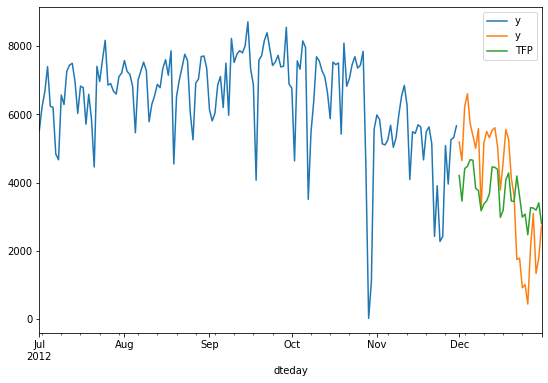

In [48]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_tfp.plot(legend = True)

In [49]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_tfp),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_tfp)), 0))

1293.0
1449.0


In [50]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_tfp)

60.98294670240557